<a href="https://colab.research.google.com/github/quentinnorris/miniproject3/blob/master/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls gdrive/'My Drive'/'COMP551'/  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
test_max_x  train_max_x  train_max_y.csv


In [0]:
datapath = 'gdrive/My Drive/COMP551/'

In [0]:
train_X=pd.read_pickle(datapath+"train_max_x")
test_X=pd.read_pickle(datapath+"test_max_x")
train_y=pd.read_csv(datapath+"train_max_y.csv")

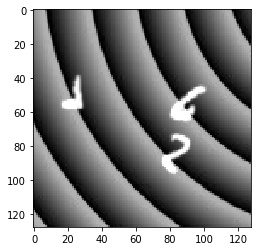

In [86]:
img = train_X[0]
plt.imshow(img, cmap="gray")

In [91]:
m = 1
for sample in train_X:
  if np.amax(sample) != 255.0:
    m = 0
m

1

In [92]:
m = 1
for sample in test_X:
  if np.amax(sample) != 255.0:
    m = 0
m

1

In [0]:
def preprocessing(x):
  x = np.uint8(x)
  y = cv2.GaussianBlur(x, (13,13), 0)

  edge = cv2.Canny(y, 90, 150)
  blur = cv2.GaussianBlur(x, (25,25), 0)

  _, contours, _ = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
  contours_poly = [None]*len(contours)
  boundRect = [None]*len(contours)
  for i, c in enumerate(contours):
      contours_poly[i] = cv2.approxPolyDP(c, 3, True)
      boundRect[i] = cv2.boundingRect(contours_poly[i])    
      
  for i in range(len(contours)):
      x1 = int(boundRect[i][0])
      x1 = max(x1-5, 0)
      
      y1 = int(boundRect[i][1])
      y1 = max(y1-5, 0)
      
      x2 = int(boundRect[i][0]+boundRect[i][2])
      if x2+5<=x.shape[1]: x2+=5
      
      y2 = int(boundRect[i][1]+boundRect[i][3])
      if y2+5<=x.shape[0]: y2+=5
      
      if np.amax(x[y1:y2, x1:x2]) == 255:
        if (x2-x1 < x.shape[1]/3 and y2-y1 < x.shape[0]/3) and (x2-x1 > 10 or y2-y1>10):
          blur[y1:y2, x1:x2] = x[y1:y2, x1:x2]
  return blur

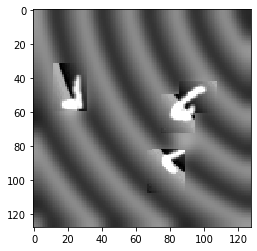

In [94]:
x = train_X[0]
x = preprocessing(x)
plt.imshow(x, cmap="gray")

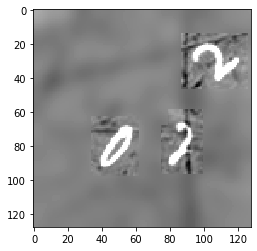

In [96]:
x = train_X[2]
x = preprocessing(x)
plt.imshow(x, cmap="gray")

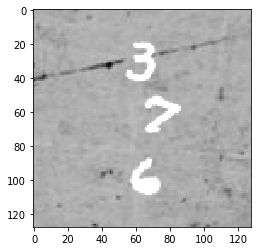

In [68]:
x3 = train_X[19]
plt.imshow(x3, cmap="gray")

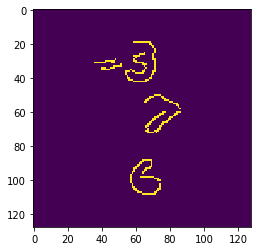

In [71]:
import cv2
x3 = np.uint8(x3)
y = cv2.GaussianBlur(x3, (11,11), 0)

# compute Canny edges
edge = cv2.Canny(y, 90, 150)
plt.imshow(edge)

blur = cv2.GaussianBlur(x3, (25,25), 0)
#plt.imshow(blur, cmap="gray")

7


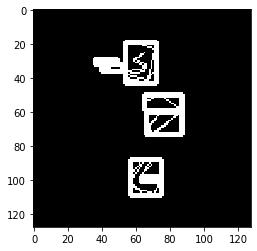

In [97]:
_, contours, _ = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))


contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])

drawing = np.zeros((edge.shape), dtype=np.uint8)


for i in range(len(contours)):
    cv2.drawContours(drawing, contours_poly, i, 255)
    cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), 255, 2)
plt.imshow(drawing, cmap="gray")
 

7


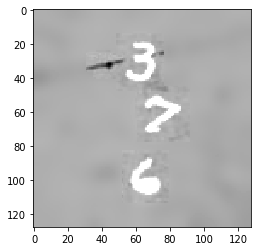

In [98]:
_, contours, _ = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
drawing = np.zeros((edge.shape), dtype=np.uint8)
extra = 5
print(len(contours))  
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])    
    
for i in range(len(contours)):
    x1 = int(boundRect[i][0])
    x1 = max(x1-5, 0)
    
    y1 = int(boundRect[i][1])
    y1 = max(y1-5, 0)
    
    x2 = int(boundRect[i][0]+boundRect[i][2])
    if x2+5<=x3.shape[1]: x2+=5
    
    y2 = int(boundRect[i][1]+boundRect[i][3])
    if y2+5<=x3.shape[0]: y2+=5
    
    if (x2-x1 < x3.shape[1]/3 and y2-y1 < x3.shape[0]/3) and (x2-x1 > 10 or y2-y1>10):
      blur[y1:y2, x1:x2] = x3[y1:y2, x1:x2]
    
plt.imshow(blur, cmap='gray')
    